In [11]:
import pyodbc
import pandas as pd

dados_conexao = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-DGSCMJ7;"
    "DATABASE=Sorte;"
    "Trusted_Connection=yes;"
)

conexao = pyodbc.connect(dados_conexao)
print("Conexão bem-sucedida!")

# Listando tabelas disponíveis
cursor = conexao.cursor()
cursor.execute("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'")
tabelas = [linha[0] for linha in cursor.fetchall()]
print("Tabelas disponíveis:", tabelas)

# Escolha uma tabela existente
nome_tabela = tabelas[0]  # ou defina manualmente: 'Clientes', 'Produtos', etc.

# Lendo os dados com pandas
df = pd.read_sql(f"SELECT * FROM {nome_tabela}", conexao)
display(df)

conexao.close()

Conexão bem-sucedida!
Tabelas disponíveis: ['clientes']


C:\Users\Esquivo\AppData\Local\Temp\ipykernel_31664\2865118865.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {nome_tabela}", conexao)


,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1006,1,37,jornalista,16756.18,9,6,22.0,2,48,182,45.30,alto_gasto_pagamento_medio,310.39,Poor,False,False,False,True,False
1,1007,1,48,gerente,21212.91,3,4,10.0,3,19,346,30.37,alto_gasto_pagamento_medio,323.56,Standard,False,True,False,False,True
2,1008,1,37,desenvolvedor,33540.43,6,3,17.0,0,25,292,50.93,alto_gasto_pagamento_baixos,406.62,Standard,False,False,False,False,False
3,1009,1,22,contador,80983.64,6,3,15.0,4,19,331,101.12,alto_gasto_pagamento_medio,581.43,Standard,False,False,False,True,True
4,1011,1,43,escritor,104142.56,3,5,5.0,3,15,179,102.49,alto_gasto_pagamento_baixos,553.40,Standard,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,50984,1,20,mecanico,19267.17,6,5,26.0,6,13,157,47.87,baixo_gasto_pagamento_baixo,210.59,Poor,False,True,False,False,False
12496,50990,1,38,advogado,32125.54,7,9,23.0,3,15,70,34.88,alto_gasto_pagamento_alto,385.51,Poor,True,True,False,False,False
12497,50992,1,23,jornalista,9608.03,7,4,10.0,6,8,159,0.00,baixo_gasto_pagamento_medio,307.71,Standard,False,True,False,True,True
12498,50996,1,38,gerente_midia,27305.93,3,4,19.0,0,21,206,26.38,baixo_gasto_pagamento_medio,368.44,Standard,False,False,False,False,False


In [13]:
import plotly.express as px

In [24]:
grafico = px.box(
    df,
    x="profissao",
    y="salario_anual",
    color="profissao",
    title="Distribuição Salarial por Profissão",
    labels={"profissao": "Profissão", "salario_anual": "Salário Anual (R$)"}
)

grafico.update_layout(xaxis_title="Profissão", yaxis_title="Salário Anual (R$)")
grafico.show()


<Axes: >

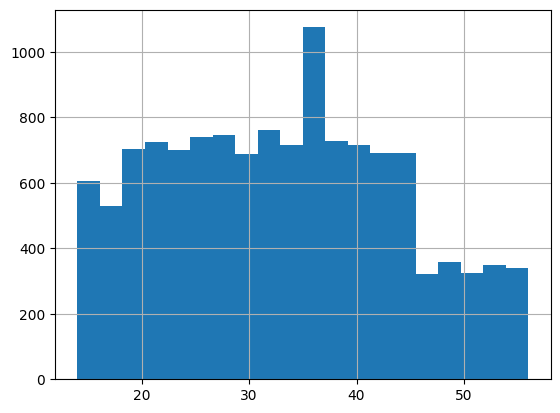

In [25]:
df["idade"].hist(bins=20)

In [26]:
df.groupby("profissao")["salario_anual"].mean().sort_values()

profissao
jornalista       48430.088433
medico           49517.750085
advogado         49594.217430
professor        49865.039101
mecanico         50095.107627
desenvolvedor    50128.422238
gerente_midia    50618.437405
contador         50726.120486
engenheiro       50730.654068
empresario       50987.698255
escritor         51047.656180
cientista        51196.427722
musico           51365.524345
gerente          51466.767774
arquiteto        51875.392333
Name: salario_anual, dtype: float64

In [27]:
df.groupby(pd.cut(df["idade"], bins=[18, 30, 45, 60]))[["num_contas", "num_cartoes"]].mean()

C:\Users\Esquivo\AppData\Local\Temp\ipykernel_31664\1214335244.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,num_contas,num_cartoes
idade,,
"(18, 30]",5.543635,5.611822
"(30, 45]",5.487070,5.629953
"(45, 60]",3.879504,4.590667


In [28]:
df.groupby(pd.cut(df["idade"], bins=[18, 30, 45, 60]))[["num_contas", "num_cartoes"]].mean()

C:\Users\Esquivo\AppData\Local\Temp\ipykernel_31664\1214335244.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,num_contas,num_cartoes
idade,,
"(18, 30]",5.543635,5.611822
"(30, 45]",5.487070,5.629953
"(45, 60]",3.879504,4.590667


In [29]:
df[["salario_anual", "investimento_mensal"]].corr()

,salario_anual,investimento_mensal
salario_anual,1.000000,0.806281
investimento_mensal,0.806281,1.000000


<Axes: xlabel='juros_emprestimo', ylabel='num_emprestimos'>

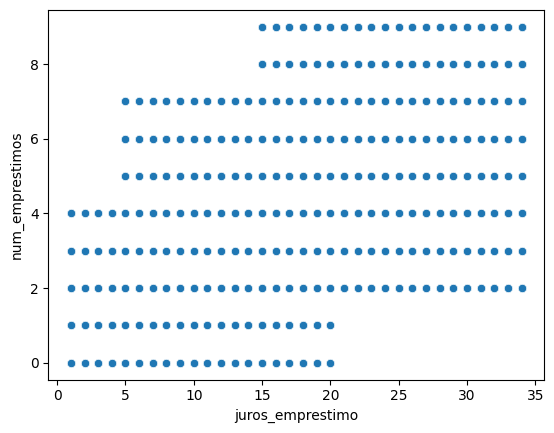

In [30]:
import seaborn as sns
sns.scatterplot(data=df, x="juros_emprestimo", y="num_emprestimos")

In [31]:
df[df["dias_atraso"] > 30][["id_cliente", "idade_historico_credito", "dias_atraso"]]

,id_cliente,idade_historico_credito,dias_atraso
0,1006,182,48
8,1017,206,34
27,1074,154,50
29,1085,119,49
30,1088,64,36
...,...,...,...
12464,50875,122,44
12467,50883,62,47
12470,50892,214,41
12480,50946,69,38


In [32]:
df["comportamento_pagamento"].value_counts()

comportamento_pagamento
baixo_gasto_pagamento_baixo    3516
alto_gasto_pagamento_medio     2479
alto_gasto_pagamento_alto      1918
baixo_gasto_pagamento_medio    1796
alto_gasto_pagamento_baixos    1496
baixo_gasto_pagamento_alto     1295
Name: count, dtype: int64

In [33]:
df.groupby("comportamento_pagamento")["salario_anual"].mean()

comportamento_pagamento
alto_gasto_pagamento_alto      75561.094969
alto_gasto_pagamento_baixos    49622.833770
alto_gasto_pagamento_medio     57291.800323
baixo_gasto_pagamento_alto     47493.636834
baixo_gasto_pagamento_baixo    31571.423342
baixo_gasto_pagamento_medio    54352.086353
Name: salario_anual, dtype: float64

In [34]:
df["faixa_salarial"] = pd.cut(df["salario_anual"], bins=[0, 20000, 40000, 60000], labels=["Baixo", "Médio", "Alto"])

In [35]:
df.groupby(["profissao", "comportamento_pagamento"]).size().unstack()

comportamento_pagamento,alto_gasto_pagamento_alto,alto_gasto_pagamento_baixos,alto_gasto_pagamento_medio,baixo_gasto_pagamento_alto,baixo_gasto_pagamento_baixo,baixo_gasto_pagamento_medio
profissao,,,,,,
advogado,151,109,188,85,244,110
arquiteto,135,117,203,83,188,127
cientista,131,120,155,96,226,115
contador,107,116,167,93,235,125
desenvolvedor,125,94,165,90,236,130
empresario,123,114,150,98,237,109
engenheiro,132,89,190,84,243,120
escritor,144,93,160,73,204,114
gerente,128,86,156,88,230,116
